Saving hansen_tree_cover_loss_bc.csv to hansen_tree_cover_loss_bc (7).csv


<ipython-input-8-ff99fdda2a67>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Tree_Loss_Ha', data=df, palette='viridis')


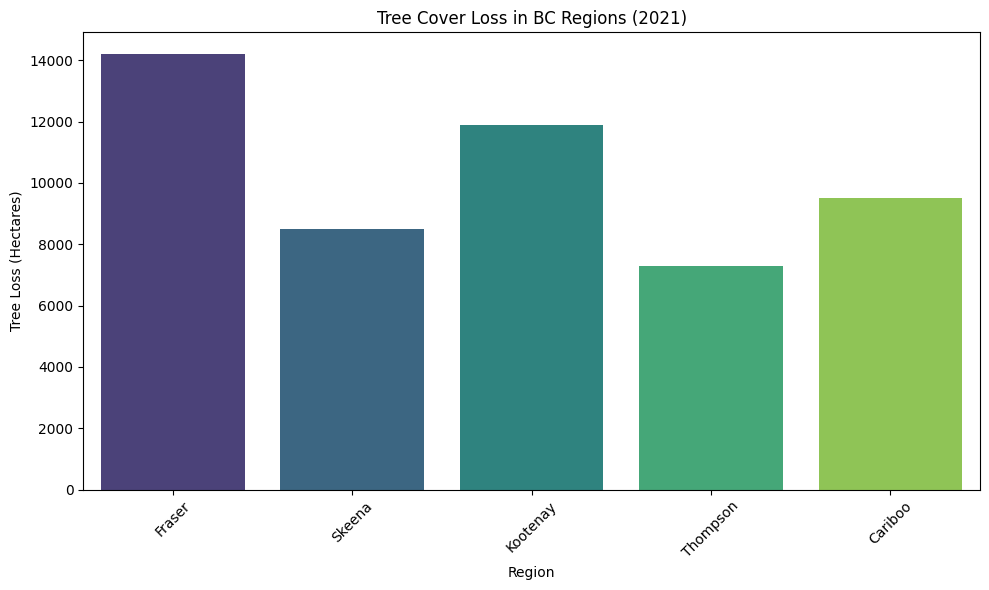

Saving climate_variability_bc.csv to climate_variability_bc (3).csv


Saving human_pressure_bc.csv to human_pressure_bc (1).csv


,Region,Human_Pressure_Index
0,Fraser,72
1,Skeena,43
2,Kootenay,56
3,Thompson,61
4,Cariboo,49


In [8]:
# Step 1: Install libraries (if not already)
!pip install geopandas folium --quiet

# Step 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load uploaded dataset
from google.colab import files
uploaded = files.upload()  # Use this if you haven't already uploaded manually

# Load the CSV (replace with filename if uploaded manually)
df = pd.read_csv('hansen_tree_cover_loss_bc.csv')

# Step 4: Preview the data
df.head()

# Visualize tree loss per region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Tree_Loss_Ha', data=df, palette='viridis')
plt.title('Tree Cover Loss in BC Regions (2021)')
plt.ylabel('Tree Loss (Hectares)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add a new column: Tree Loss Ratio (Tree Loss ÷ Total Area)
df['Tree_Loss_Ratio'] = df['Tree_Loss_Ha'] / df['Total_Area_Ha']

# Normalize Tree Loss Ratio to 0–1 scale (min-max normalization)
min_val = df['Tree_Loss_Ratio'].min()
max_val = df['Tree_Loss_Ratio'].max()
df['Normalized_Tree_Loss'] = (df['Tree_Loss_Ratio'] - min_val) / (max_val - min_val)

# Show results
df[['Region', 'Tree_Loss_Ha', 'Tree_Loss_Ratio', 'Normalized_Tree_Loss']]
# Step 1: Upload
from google.colab import files
uploaded = files.upload()

# Step 2: Load climate data
climate_df = pd.read_csv('climate_variability_bc.csv')
climate_df.head()
# Merge both datasets by Region
merged_df = pd.merge(df, climate_df, on='Region', how='left')

# Normalize temperature seasonality to get climate risk (0–1)
min_temp = merged_df['Temp_Seasonality'].min()
max_temp = merged_df['Temp_Seasonality'].max()
merged_df['Normalized_Climate_Risk'] = (merged_df['Temp_Seasonality'] - min_temp) / (max_temp - min_temp)

# Preview
merged_df[['Region', 'Temp_Seasonality', 'Normalized_Climate_Risk']]
# Upload CSV
from google.colab import files
uploaded = files.upload()

# Load human pressure data
human_df = pd.read_csv('human_pressure_bc.csv')
human_df.head()






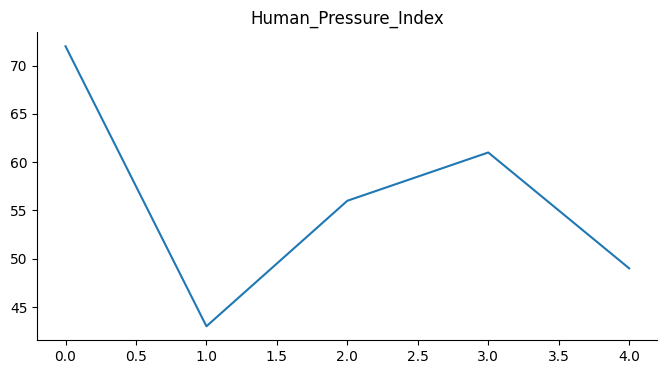

In [9]:
# @title Human_Pressure_Index

from matplotlib import pyplot as plt
human_df['Human_Pressure_Index'].plot(kind='line', figsize=(8, 4), title='Human_Pressure_Index')
plt.gca().spines[['top', 'right']].set_visible(False)